## Test torch installation

In [10]:
# test torch installation
from __future__ import print_function
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.9730, 0.0459, 0.9169],
        [0.4800, 0.8248, 0.2752],
        [0.8756, 0.7512, 0.4709],
        [0.2522, 0.2380, 0.8649],
        [0.7962, 0.0761, 0.2898]])


In [11]:
# import packages
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn

In [12]:
# normalize the imges from torch vision to -1, 1
transform = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [13]:
# load the dataset

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [14]:
# they are 10 classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

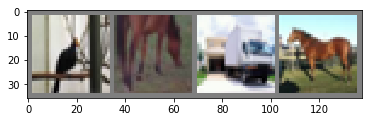

 bird horse truck horse


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # input channel, output channel, kernel/filter size 
        self.conv1 = nn.Conv2d(3, 6, 5)
        # size to zoom in, stride as you move across
        self.pool = nn.MaxPool2d(2, 2)
        # add another layer
        # (W−F+2P)/S+1.
        self.conv2 = nn.Conv2d(6, 16, 5)
        # flatten
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
# train the network
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.168
[1,  4000] loss: 1.807
[1,  6000] loss: 1.665
[1,  8000] loss: 1.569
[1, 10000] loss: 1.510
[1, 12000] loss: 1.442
[2,  2000] loss: 1.364
[2,  4000] loss: 1.345
[2,  6000] loss: 1.331
[2,  8000] loss: 1.309
[2, 10000] loss: 1.286
[2, 12000] loss: 1.280
Finished Training
